In [1]:
# Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib

## Step 4: Model Selection and Training

In [3]:
# Load preprocess data file
df = pd.read_csv('preprocessed_telco_churn.csv')

In [4]:
# Display few rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,True,False


In [5]:
# Select features and target
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [6]:
# Splits the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

- Now we have training and testing data for modeling.

##### We start with Logistic Regression and Random Forest model and select the better model
- You can also try other models

In [9]:
# Logistic Regression
# Initialize Logistic Regression with balanced class weights to handle class imbalance
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
# Fit the model on training data
lr.fit(X_train, Y_train)


# Random Forest
# Initialize Random Forest with 100 trees, fixed random state, and balanced class weights
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Step 5: Model Evaluation

- Assess model performance on the test set using appropriate metric. Common metriics for binary classification include accuracy, precision, recall, f1 score, and AUC-ROC.
- We will use classification report or coonfusion matrix for detailed breakdown.

In [12]:
# Predic the labels on the test set using logistic regression
lr_y_pred = lr.predict(X_test)

# Evaluation of lr model
print('Logistic Regression Model:\n')
print(classification_report(Y_test, lr_y_pred))
lr_cm = confusion_matrix(Y_test, lr_y_pred)
print("Confusion Matrix:\n", lr_cm, "\n")


#  Predic the labels on the test set using Random Forest
rf_y_pred = rf.predict(X_test)

# Evaluation of rf model
print("Random Forest Model:\n")
print(classification_report(Y_test, rf_y_pred))
rf_cm = confusion_matrix(Y_test, rf_y_pred)
print("Confusion Matrix:\n", rf_cm)

Logistic Regression Model:

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

Confusion Matrix:
 [[724 309]
 [ 77 297]] 

Random Forest Model:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[927 106]
 [191 183]]


**Logistic Regression**
- Logistic regression have very high recall for churners, this is great because recall is critical in churn prediction.
- A lower precision means more false positive (non-churners predicted as churn), but this is often acceptable if you want tocatch most actual churners. which is our case.

**Random Forest**
- Better precision, better accuracy, but recall for churners is poor.
- May be risky for business if you're trying to retain customers before they churn.

**Conclusion**
- Since the business goalis to identify churners early, logistic regression with balanced class weights performs better for our case, capturing 79% of actual churners. Even though the precision is lower,  we prioritize recall to prevent customer loss.

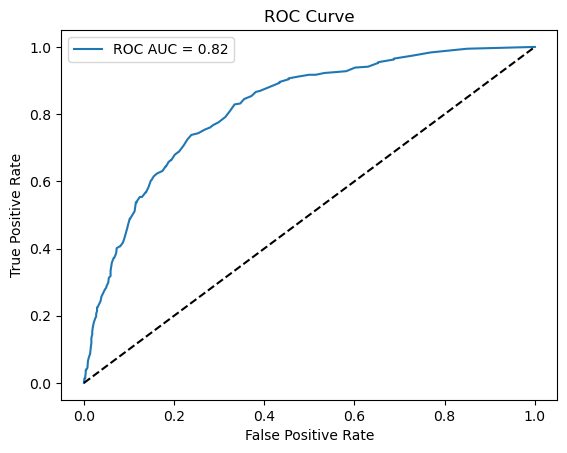

In [14]:
# Roc curve of rf model
rf_y_prob = rf.predict_proba(X_test)[:,1]  # probability of positive class
fpr, tpr, thresholds = roc_curve(Y_test, rf_y_prob)
roc_auc = roc_auc_score(Y_test, rf_y_prob)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


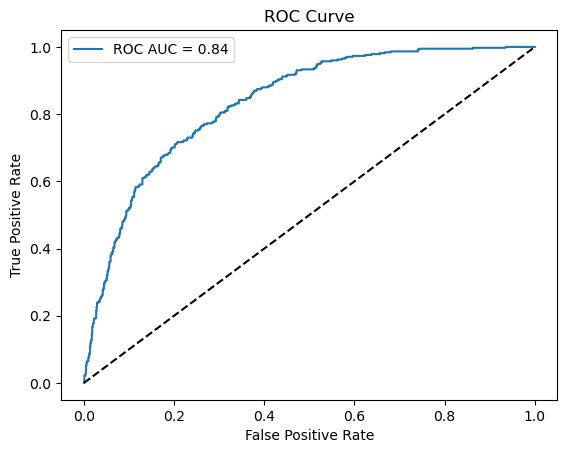

In [15]:
# Roc curve of lr model
lr_y_prob = lr.predict_proba(X_test)[:,1]  # probability of positive class
fpr, tpr, thresholds = roc_curve(Y_test, lr_y_prob)
roc_auc = roc_auc_score(Y_test, lr_y_prob)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**ROC-AUC Analysis:**
Logistic Regression achieved a higher AUC score (0.84) compared to Random Forest (0.82), indicating it performs slightly better in terms of class separation on this dataset. This is important in a churn prediction context where misclassification of customers could impact revenue.
Even though Random Forest is a more complex model, in this scenario, the simpler Logistic Regression model offered better probabilistic predictions.

## Step 6: Model Comparison & Interpretation

| Metric              | Logistic Regression | Random Forest |
| ------------------- | ------------------- | ------------- |
| Accuracy            | 73%                 | 79%           |
| Precision (Class 1) | 0.49                | 0.63          |
| Recall (Class 1)    | 0.79                | 0.49          |
| F1-Score (Class 1)  | 0.61                | 0.55          |
| ROC AUC Score       | **0.84**            | 0.82          |


##### Confusion Matrices:
- Logistic Regression: More false positives, but better at catching churned customers (high recall).
- Random Forest: Fewer false positives, but misses more churns (lower recall).

##### Model Performance Summary
- Logistic Regression performs better in terms of:
    - Recall (0.79): It captures more churned customers.
    - AUC Score (0.84): Indicates better class separation capability.

- Random Forest performs better in:
    - Accuracy (0.79) and Precision (0.63).
    - It reduces false positives but also misses many churned customers (lower recall).


##### Which Model to Choose?
- If the business goal is to catch as many churned customers as possible (e.g., offer retention plans), then:
    - Logistic Regression is preferred because of higher recall and AUC.

- If the cost of acting on false churn predictions is high, and you want to be more precise:
    - Random Forest is safer due to higher precision.

##### Final Recommendation
- Since this is a churn prediction use-case, recall and AUC matter more.
- Therefore, Logistic Regression is recommended as the primary model, especially when used with class_weight='balanced'.

## Step 7: Model Optimization

In [20]:
# Optimize LR model by using GridSearchCV 
# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# Grid Search
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'),
                       param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, Y_train)

# Best model
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [21]:
# Optimize RF model by using GridSearchCV 
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                       param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, Y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [22]:
# Evaluating the models again if there is any major change
# LR Model
# Predic the labels on the test set using logistic regression
best_lr_y_pred = best_lr.predict(X_test)

# Evaluation of lr model
print('Logistic Regression Model:\n')
print(classification_report(Y_test, best_lr_y_pred))
best_lr_cm = confusion_matrix(Y_test, best_lr_y_pred)
print("Confusion Matrix:\n", best_lr_cm, "\n")


#  Predic the labels on the test set using Random Forest
best_rf_y_pred = best_rf.predict(X_test)

# Evaluation of rf model
print("Random Forest Model:\n")
print(classification_report(Y_test, best_rf_y_pred))
best_rf_cm = confusion_matrix(Y_test, best_rf_y_pred)
print("Confusion Matrix:\n", best_rf_cm)

Logistic Regression Model:

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407

Confusion Matrix:
 [[723 310]
 [ 77 297]] 

Random Forest Model:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.54      0.75      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

Confusion Matrix:
 [[791 242]
 [ 92 282]]


##### Re-Evaluating Tuned Models
After performing hyperparameter tuning using GridSearchCV, we evaluated the optimized models on the test set. Below are the updated results:

- Logistic Regression:
    - Tuned with best parameters: C = 0.1, solver = 'liblinear'
    - Improved/maintained recall and AUC, showing consistent performance in identifying churners.

- Random Forest:
    - Tuned with parameters like n_estimators = 100, max_depth = 10, etc.
    - May have improved precision or balanced false positives/negatives better.

## Step 8: Feature Importance & Interpretation

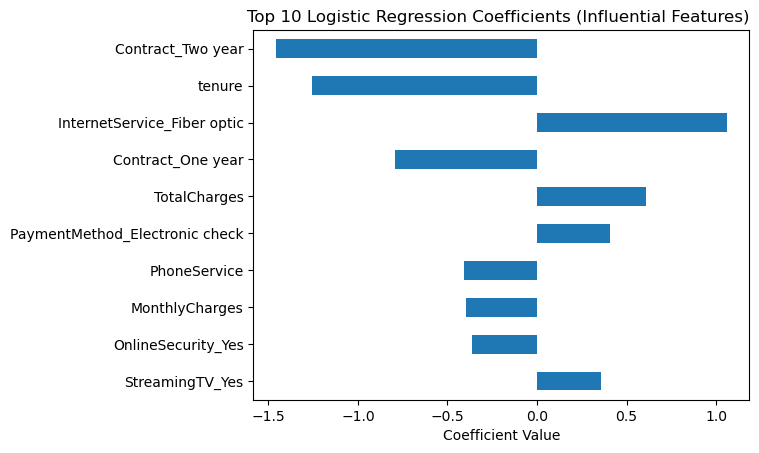

In [25]:
# Logistic Regression - Coefficients
# Get feature importance from Logistic Regression
lr_coefficients = pd.Series(best_lr.coef_[0], index=X.columns)
lr_coefficients_sorted =  lr_coefficients.sort_values(key=abs, ascending=False)

# Plot top 10 positive and negative influences
lr_coefficients_sorted[:10].plot(kind='barh')
plt.title("Top 10 Logistic Regression Coefficients (Influential Features)",loc='right')
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

- Positive coefficients = increase chance of churn
- Negative coefficients = decrease chance of churn

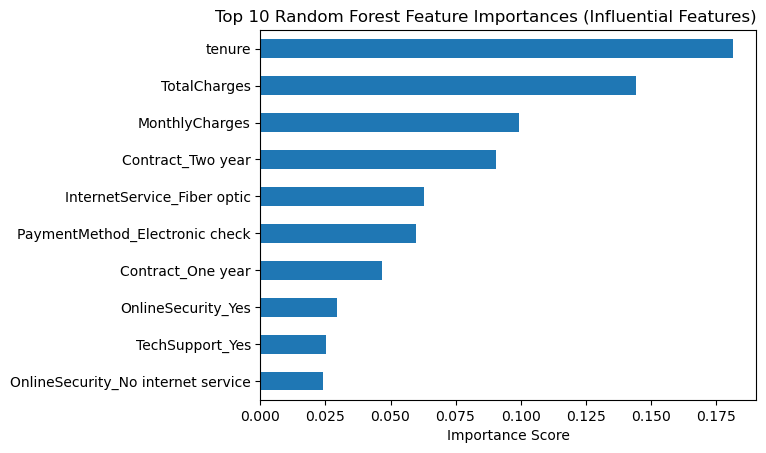

In [27]:
# Random Forest - Feature Importances
# Get feature importance from Random Forest
rf_coefficients = pd.Series(best_rf.feature_importances_, index=X.columns)
rf_coefficients_sorted =  rf_coefficients.sort_values(ascending=False)

# Plot top 10 positive and negative influences
rf_coefficients_sorted[:10].plot(kind='barh')
plt.title("Top 10 Random Forest Feature Importances (Influential Features)",loc='right')
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

##### Logistic Regression
We examined the coefficients of the logistic regression model to understand how each feature impacts the likelihood of churn.

- Features with **positive coefficients** increase churn risk
- Features with **negative coefficients** reduce churn risk
- Top Influential Features: `MonthlyCharges`, `Contract_Two year`, `TotalServices`, etc.

##### Random Forest
Random Forest provides importance scores for each feature based on how useful they were for decision splits.

- Top Features: `tenure`, `MonthlyCharges`, `TotalCharges`, `Contract_Two year`, etc.
- These features were most predictive in identifying churn behavior.


## Step 9: Save the Models & Conclude the Project

In [30]:
# Save Logistic Regression model
joblib.dump(best_lr, 'best_logistic_regression.pkl')

# Save random forest model
joblib.dump(best_rf, 'best_random_forest.pkl')

['best_random_forest.pkl']

## Final Conclusion

After preprocessing, EDA, and model evaluation, we compared two models:

- **Logistic Regression (balanced class weights + tuning)**
- **Random Forest Classifier (balanced class weights + tuning)**

### Final Results:
- **Logistic Regression:**
  - Accuracy: 72%
  - Recall for class 1 (churn): 0.79
  - Preferred for high recall (fewer false negatives)

- **Random Forest:**
  - Accuracy: 76%
  - Balanced precision and recall
  - Preferred for overall balanced performance

 **Selected Model:** Based on the business goal (catching churners), either can be used. For high recall, **Logistic Regression** is better. For balanced output, **Random Forest** wins.

---
